In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv('tips.csv')
df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical features
X = df.drop(columns=['tip'])  # Assuming 'tip' is the target variable
y = df['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

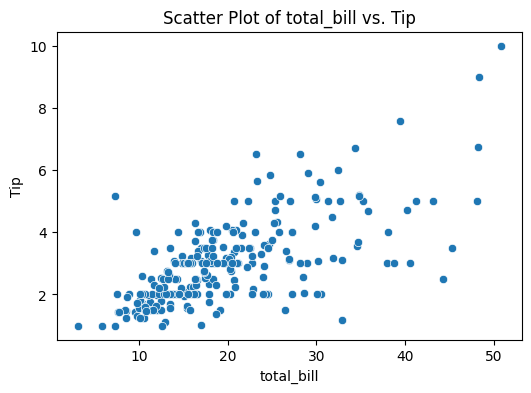

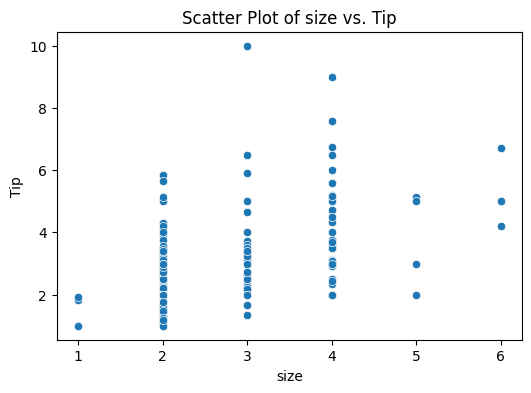

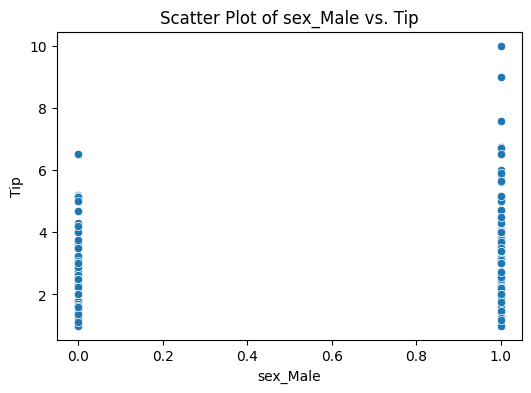

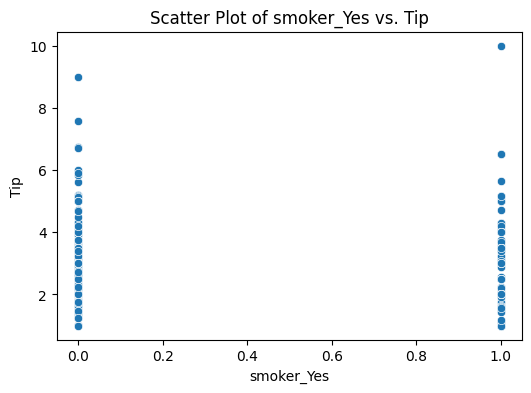

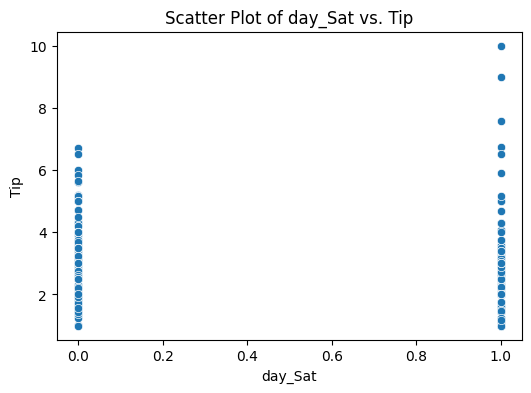

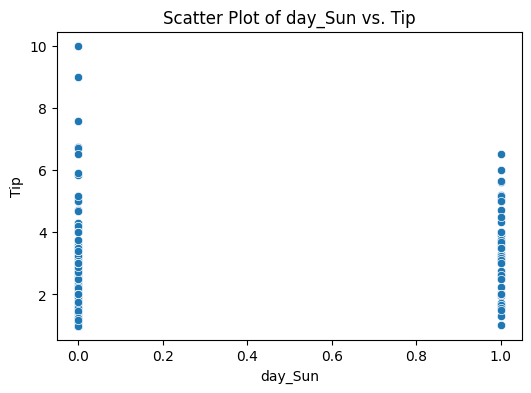

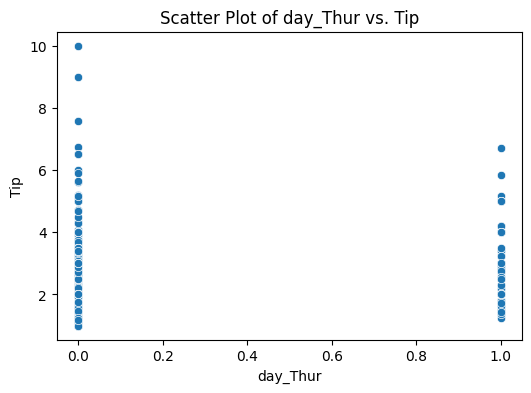

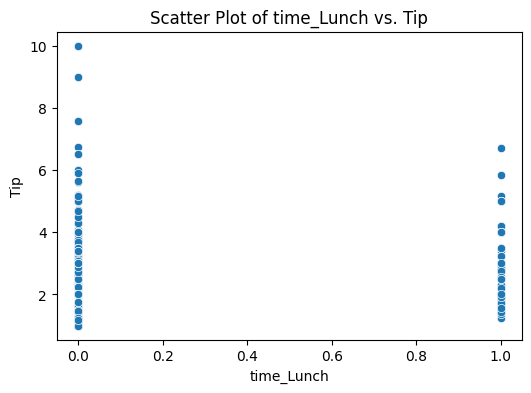

In [3]:
# Scatter plots to examine relationships between each feature and 'tip'
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[column], y=y)
    plt.title(f'Scatter Plot of {column} vs. Tip')
    plt.xlabel(column)
    plt.ylabel('Tip')
    plt.show()

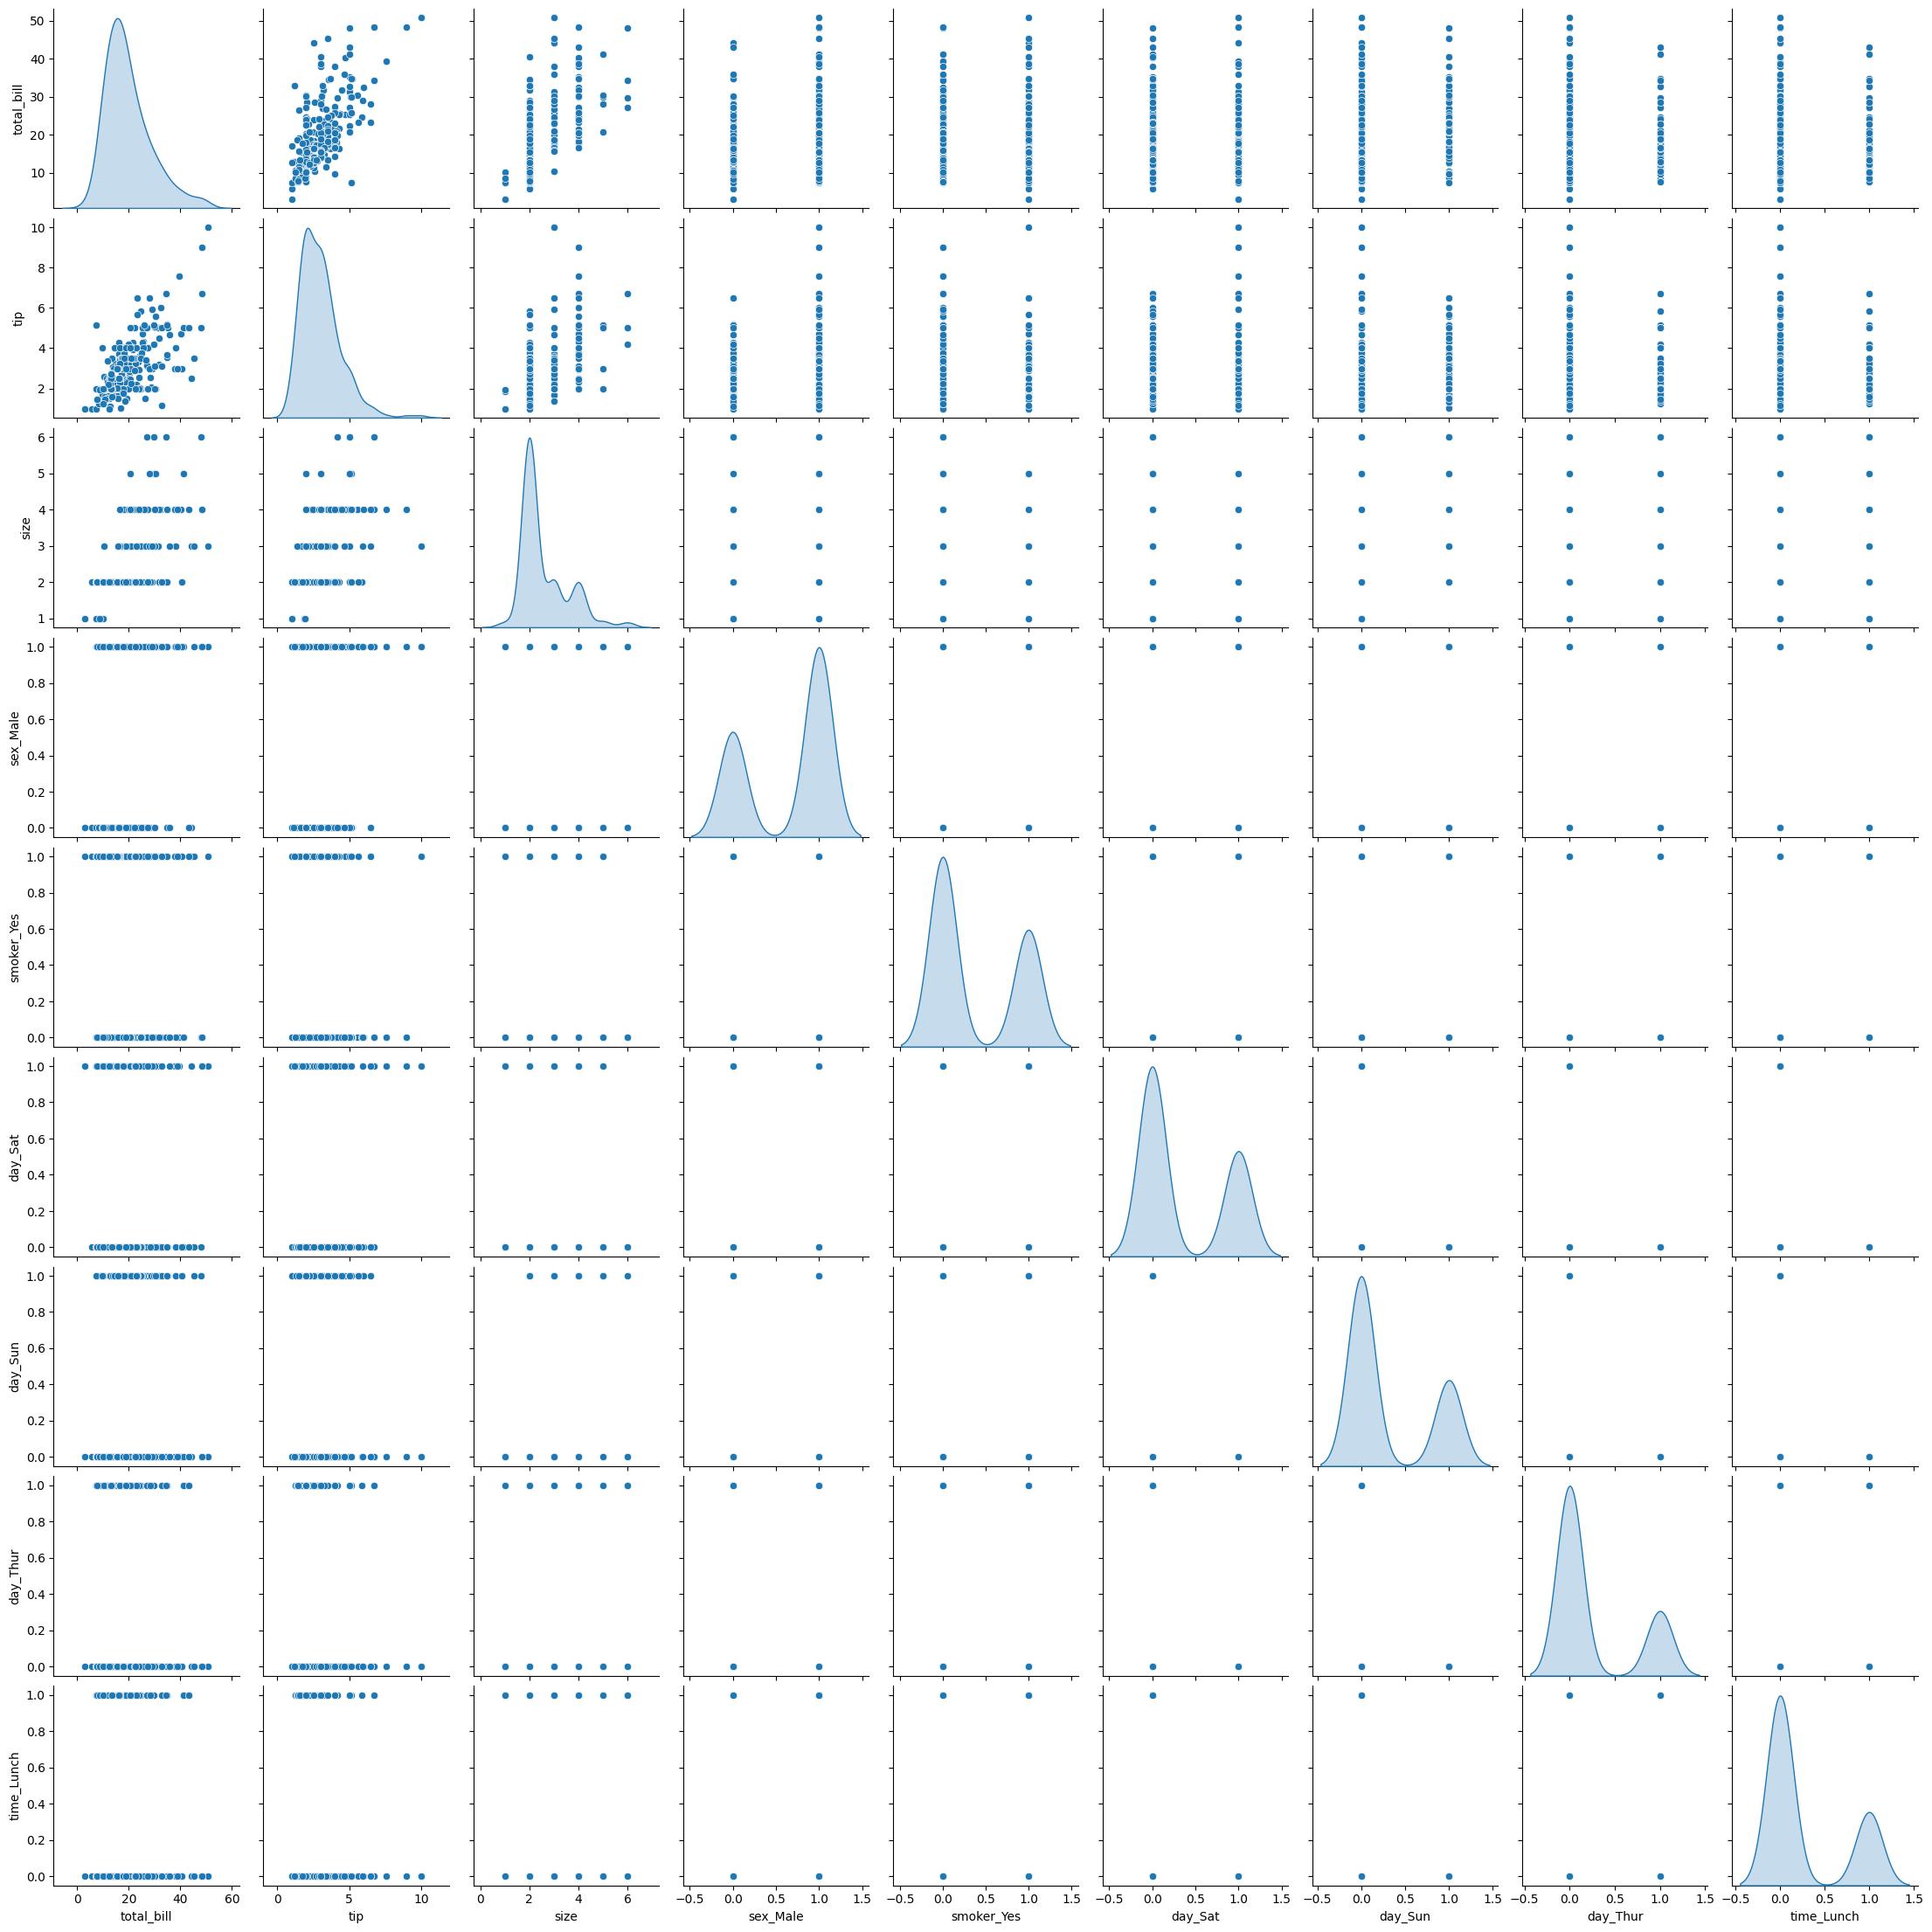

In [4]:
# Pair plot to visualize relationships between features and 'tip'
sns.pairplot(df, diag_kind='kde')
plt.show()

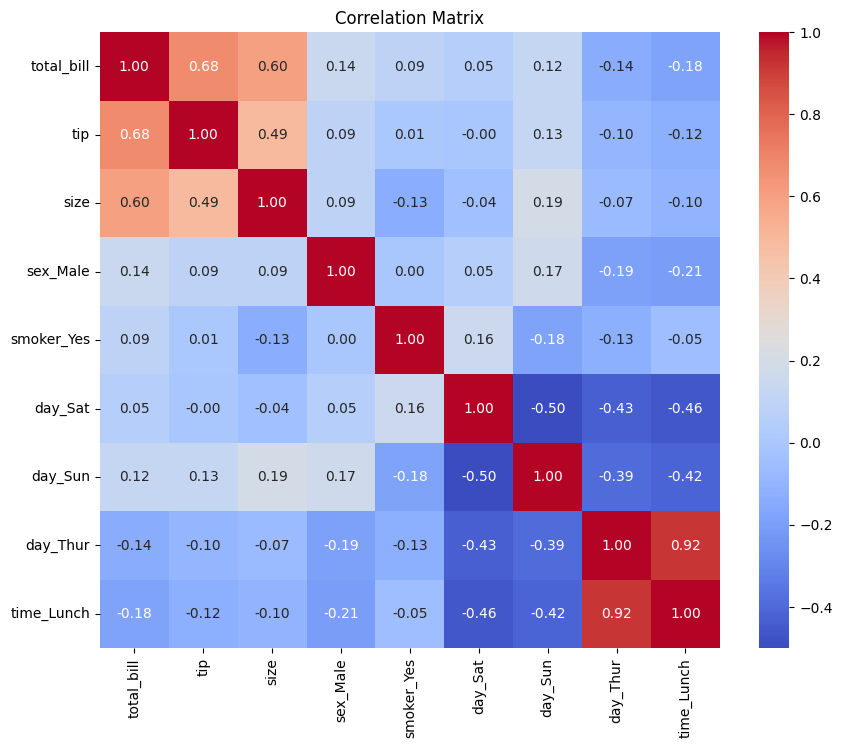

In [5]:
# Heatmap to show correlation between features and the target variable
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [6]:
# Check for time series trends if data includes a time component
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'])  # Ensure 'time' is datetime type
    plt.figure(figsize=(10, 6))
    plt.plot(df['time'], y, label="Tip Amount")
    plt.xlabel("Time")
    plt.ylabel("Tip")
    plt.title("Time-Series Plot of Tips")
    plt.legend()
    plt.show()

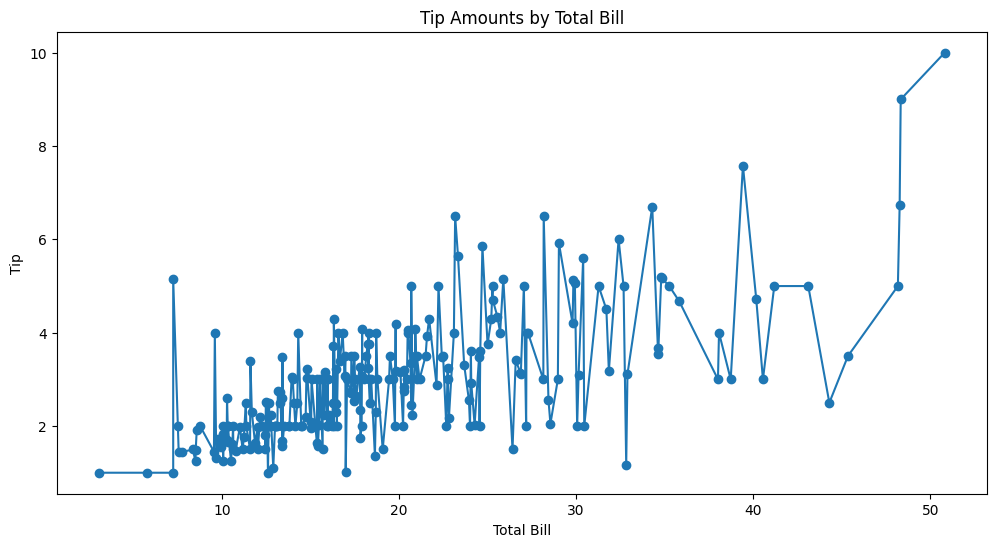

In [7]:
sorted_data = df.sort_values(by='total_bill')
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['total_bill'], sorted_data['tip'], marker='o', linestyle='-')
plt.title("Tip Amounts by Total Bill")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()

In [8]:
X = df[['total_bill', 'size']]  # Replace with relevant predictors
y = df['tip']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(model)
print("Rainbow test p-value:", rainbow_p_val)
if rainbow_p_val < 0.05:
    print("Non-linearity detected (p < 0.05), consider non-linear models.")
else:
    print("Data appears linear (p >= 0.05).")


Rainbow test p-value: 0.17048935693447642
Data appears linear (p >= 0.05).


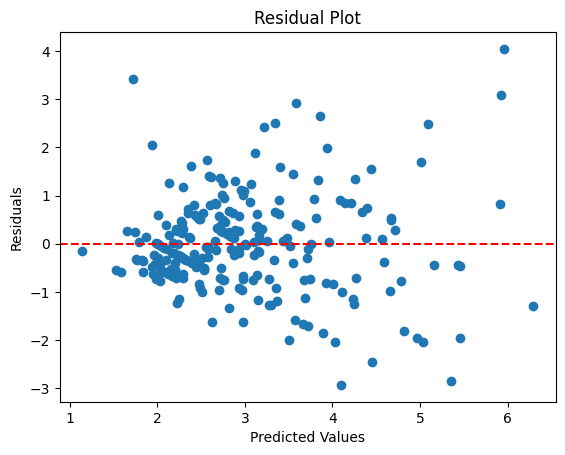

In [9]:
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### MODELS AND THEIR TRAINING

In [24]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R^2 Score: {r2:.2f}")
    print("-" * 30)
    return mse, mae, r2

In [25]:
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(name, model, X_train, X_test, y_train, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

Linear Regression Performance:
Mean Squared Error: 0.70
Mean Absolute Error: 0.67
R^2 Score: 0.44
------------------------------
Ridge Regression Performance:
Mean Squared Error: 0.70
Mean Absolute Error: 0.67
R^2 Score: 0.44
------------------------------
Lasso Regression Performance:
Mean Squared Error: 0.68
Mean Absolute Error: 0.66
R^2 Score: 0.46
------------------------------
Decision Tree Performance:
Mean Squared Error: 1.26
Mean Absolute Error: 0.83
R^2 Score: -0.00
------------------------------
Random Forest Performance:
Mean Squared Error: 0.92
Mean Absolute Error: 0.76
R^2 Score: 0.26
------------------------------
SVR Performance:
Mean Squared Error: 0.53
Mean Absolute Error: 0.57
R^2 Score: 0.57
------------------------------
KNN Performance:
Mean Squared Error: 0.88
Mean Absolute Error: 0.72
R^2 Score: 0.30
------------------------------


In [26]:
# Extract feature importance for models that provide it
for name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest']:
    model = models[name]
    model.fit(X_train, y_train)
    if hasattr(model, 'coef_'):
        print(f"{name} Coefficients:")
        for feature, coef in zip(X.columns, model.coef_):
            print(f"{feature}: {coef:.4f}")
    elif hasattr(model, 'feature_importances_'):
        print(f"{name} Feature Importances:")
        for feature, importance in zip(X.columns, model.feature_importances_):
            print(f"{feature}: {importance:.4f}")
    print("-" * 30)

Linear Regression Coefficients:
total_bill: 0.0947
size: 0.2335
sex_Male: 0.0288
smoker_Yes: -0.1924
day_Sat: -0.1858
day_Sun: -0.0508
day_Thur: -0.1797
time_Lunch: 0.0950
------------------------------
Ridge Regression Coefficients:
total_bill: 0.0947
size: 0.2317
sex_Male: 0.0273
smoker_Yes: -0.1844
day_Sat: -0.1670
day_Sun: -0.0314
day_Thur: -0.1424
time_Lunch: 0.0780
------------------------------
Lasso Regression Coefficients:
total_bill: 0.0946
size: 0.2247
sex_Male: 0.0000
smoker_Yes: -0.1377
day_Sat: -0.0976
day_Sun: 0.0000
day_Thur: -0.0000
time_Lunch: 0.0000
------------------------------
Random Forest Feature Importances:
total_bill: 0.7670
size: 0.0580
sex_Male: 0.0252
smoker_Yes: 0.0694
day_Sat: 0.0303
day_Sun: 0.0252
day_Thur: 0.0118
time_Lunch: 0.0130
------------------------------


## Here are the most contributing features for each model based on the absolute highest coefficient or feature importance:

### 1. Linear Regression
Most Contributing Feature: size (0.2335)

### 2. Ridge Regression
Most Contributing Feature: size (0.2317)

### 3. Lasso Regression
Most Contributing Feature: size (0.2247)

### 4. Random Forest
Most Contributing Feature: total_bill (0.7670)



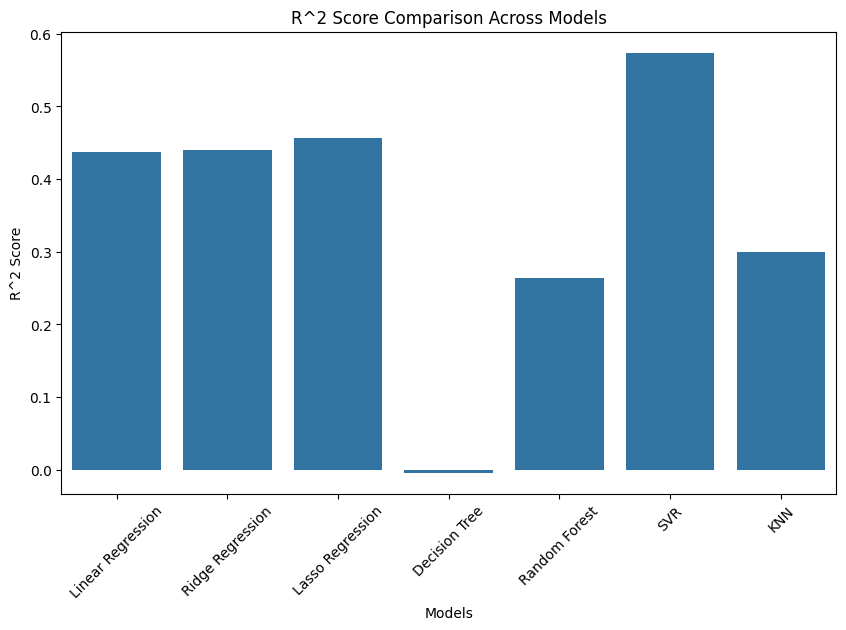

In [27]:
# Visualize R2 scores of each model
model_names = list(results.keys())
r2_scores = [results[name]['R2'] for name in model_names]

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=r2_scores)
plt.title("R^2 Score Comparison Across Models")
plt.xlabel("Models")
plt.ylabel("R^2 Score")
plt.xticks(rotation=45)
plt.show()

#### Here we can see that SVR (Support Vector Regression, with 'rbf' kernel) performs the best amongst all the other regression model

# Insights for Management :

## Focus on Group Service
Larger groups leave higher tips. Offer group discounts and assign experienced staff to serve larger tables for better service and higher tips.

## Encourage Higher Bills
Higher spending correlates with higher tips. Train staff to upsell, create premium packages, and strategically design the menu to boost total bill amounts.

## Boost Weekend Spending
Tips are slightly lower on weekends. Use promotions and special offers on weekends to drive spending and improve tips.

## Optimize for Non-Smokers
Smokers tend to tip less. Create designated smoking areas and offer incentives for non-smoking sections to improve the environment and encourage higher tipping.

## Tailor Service by Demographics
Small differences in tipping by gender suggest targeted service approaches could be effective. Train staff to adapt based on customer demographics.

## Streamline Lunch Service
Lunch tips are consistent but lower. Offer quick, efficient lunch options and deals to attract a larger crowd and increase revenue.
By implementing these strategies, management can enhance customer satisfaction, improve revenue, and encourage higher tipping.